In [2]:
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt


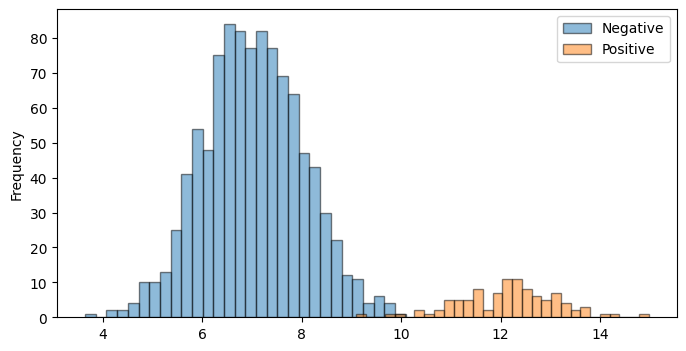

In [3]:
pos_center=12
pos_count=100
neg_center=7
neg_count=1000
rs=rn.RandomState(rn.MT19937(rn.SeedSequence(42)))
gini=pd.DataFrame({'value':
                   np.append((pos_center)+ rs.randn(pos_count),
                             (neg_center)+ rs.randn(neg_count)),'label':['pos']*pos_count+['neg']*neg_count})
fig,ax=plt.subplots(figsize=(8,4))
_=(gini
   .groupby('label')
   [['value']]
   .plot.hist(bins=30,alpha=.5,ax=ax,edgecolor='black')
   )
ax.legend(['Negative','Positive'])
